# Here there is Only the Cleaning of the Model

In [305]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import KNNImputer


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [306]:
df1_test = pd.read_csv('Surveydata_test_cleaned_v2.csv')
df2_test = pd.read_csv('Traveldata_test_cleaned_v2.csv')

df_union_test = pd.merge(df1_test, df2_test, on = 'ID')
del df_union_test['Unnamed: 0_x']
del df_union_test['Unnamed: 0_y']

df_union_test.shape



(35602, 24)

In [307]:
df1_train = pd.read_csv('Surveydata_train_cleaned_v2.csv')
df2_train = pd.read_csv('Traveldata_train_cleaned_v2.csv')

df_union_train = pd.merge(df1_train, df2_train, on = 'ID')
del df_union_train['Unnamed: 0_x']
del df_union_train['Unnamed: 0_y']

df_union_train.shape

(94379, 25)

In [308]:
def accuracy(y_train_test, y_pred_train_test):
    cm = confusion_matrix(y_train_test, y_pred_train_test)
    tot = sum(sum(cm))
    zero = cm[0][0]
    one = cm[1][1]

    accuracy = (one + zero)/tot
    return accuracy

In [309]:
X_train = df_union_train.drop(['ID',"Overall_Experience"], axis=1) # keep it as a Matrix
y_train = df_union_train["Overall_Experience"]  # keep it as an array

X_train.shape

(94379, 23)

In [310]:
X_test = df_union_test.drop(['ID'], axis=1) # keep it as a Matrix

X_test.shape

(35602, 23)

# deep learning

In [319]:
# Fixing the seed for random number generators
np.random.seed(5)

import random
random.seed(5)

tf.random.set_seed(5)

In [320]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(23,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.3))

# Third hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='tanh')) #'tanh

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Third hidden layer with 64 neurons and relu activation function
model_1.add(Dense(32, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))


# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation='sigmoid'))

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') 'tanh'
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, callbacks=[LearningRateReducerCb()], epochs=5)

model.evaluate(x_test, y_test)

In [321]:
#model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00075), metrics=['accuracy']) #0.001


model_1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 128)               3072      
                                                                 
 dropout_69 (Dropout)        (None, 128)               0         
                                                                 
 dense_95 (Dense)            (None, 64)                8256      
                                                                 
 dropout_70 (Dropout)        (None, 64)                0         
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dropout_71 (Dropout)        (None, 32)                0         
                                                                 
 dense_97 (Dense)            (None, 1)               

 SPLIT

In [292]:
X_train_train ,X_train_test , y_train_train, y_train_test = train_test_split(X_train , y_train, test_size=0.2, random_state=5, stratify= y_train)

In [293]:
numeric_features_min_max = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering','Platform_Location', 'Onboard_Wifi_Service', 
                            'Onboard_Entertainment','Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 
                            'CheckIn_Service', 'Cleanliness','Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel','Travel_Class']

numeric_features_standard = [   'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']


numeric_transformer = Pipeline(
    steps = [ ('scaler1', MinMaxScaler() ), ('scaler2', StandardScaler() ), ('imputer', KNNImputer(n_neighbors=4) ) ] 
    # ('imputer', SimpleImputer(strategy='median') ), ADD LATER ON, , ('imputer',  IterativeImputer(random_state=0, initial_strategy='median') ('imputer', KNNImputer(n_neighbors=4) )
)

# Here the pre-processor step
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric1", numeric_transformer, numeric_features_min_max ),
        ("numeric2", numeric_transformer, numeric_features_standard )
    ]
)

# here the Pipeline
pipe_rf = Pipeline(
    steps = [('preprocessor', preprocessor), ('regressor', RandomForestClassifier(n_estimators = 100, n_jobs=-1) ) ]#n_estimators =1000 5min try 2k
)


#X_train_train_normalized = preprocessor.fit_transform(X_train_train)

#y_pred_train_train = pipe_rf.predict(X_train_train)

#metrics_score(y_train_train, y_pred_train_train)



#X_train_test_normalized = preprocessor.transform(X_train_test)

In [170]:
history_1 = model_1.fit(X_train_train_normalized, 
                    y_train_train,
                    validation_split=0.2, 
                    epochs=10, #150 
                    verbose=2)

Epoch 1/10
1888/1888 - 4s - loss: 0.1201 - accuracy: 0.9520 - val_loss: 0.1245 - val_accuracy: 0.9501 - 4s/epoch - 2ms/step
Epoch 2/10
1888/1888 - 3s - loss: 0.1227 - accuracy: 0.9505 - val_loss: 0.1247 - val_accuracy: 0.9497 - 3s/epoch - 2ms/step
Epoch 3/10
1888/1888 - 4s - loss: 0.1224 - accuracy: 0.9514 - val_loss: 0.1247 - val_accuracy: 0.9500 - 4s/epoch - 2ms/step
Epoch 4/10
1888/1888 - 5s - loss: 0.1219 - accuracy: 0.9510 - val_loss: 0.1249 - val_accuracy: 0.9491 - 5s/epoch - 2ms/step
Epoch 5/10
1888/1888 - 5s - loss: 0.1234 - accuracy: 0.9499 - val_loss: 0.1258 - val_accuracy: 0.9493 - 5s/epoch - 2ms/step
Epoch 6/10
1888/1888 - 5s - loss: 0.1209 - accuracy: 0.9507 - val_loss: 0.1247 - val_accuracy: 0.9497 - 5s/epoch - 2ms/step
Epoch 7/10
1888/1888 - 5s - loss: 0.1235 - accuracy: 0.9503 - val_loss: 0.1260 - val_accuracy: 0.9495 - 5s/epoch - 2ms/step
Epoch 8/10
1888/1888 - 5s - loss: 0.1213 - accuracy: 0.9502 - val_loss: 0.1235 - val_accuracy: 0.9498 - 5s/epoch - 2ms/step
Epoch 9/

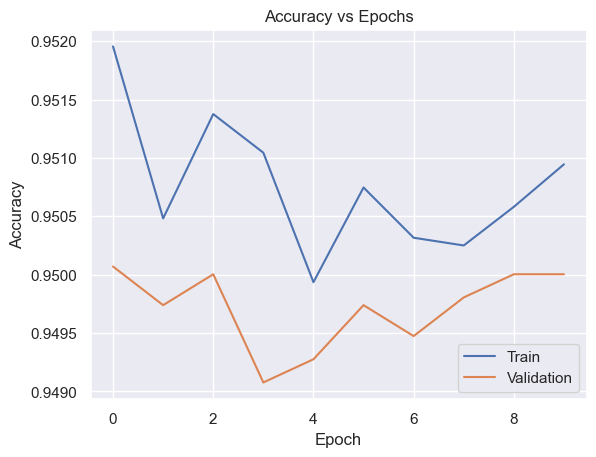

In [171]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [104]:
model_1.evaluate(X_train_test_normalized, y_train_test, verbose = 1)
test_pred = np.round(model_1.predict(X_train_test_normalized))


885/885 [==============================] - 2s 2ms/step


In [105]:
y_train_test 
right = 0
tot = 0
for i in range(len(y_train_test)):
    tot +=1
    if y_train_test.iloc[i] == int(test_pred.flatten()[i]):
        right +=1

        

In [106]:
right/tot

0.9531327258599986

# REAL TEST

In [322]:
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

In [332]:
history_1 = model_1.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs= 50, #150 
                    verbose=2)

Epoch 1/10
2655/2655 - 5s - loss: 0.0997 - accuracy: 0.9563 - val_loss: 0.1035 - val_accuracy: 0.9562 - 5s/epoch - 2ms/step
Epoch 2/10
2655/2655 - 4s - loss: 0.0992 - accuracy: 0.9571 - val_loss: 0.1038 - val_accuracy: 0.9542 - 4s/epoch - 2ms/step
Epoch 3/10
2655/2655 - 5s - loss: 0.0993 - accuracy: 0.9570 - val_loss: 0.1017 - val_accuracy: 0.9561 - 5s/epoch - 2ms/step
Epoch 4/10
2655/2655 - 5s - loss: 0.0997 - accuracy: 0.9562 - val_loss: 0.1026 - val_accuracy: 0.9558 - 5s/epoch - 2ms/step
Epoch 5/10
2655/2655 - 5s - loss: 0.0991 - accuracy: 0.9565 - val_loss: 0.1043 - val_accuracy: 0.9545 - 5s/epoch - 2ms/step
Epoch 6/10
2655/2655 - 6s - loss: 0.0981 - accuracy: 0.9569 - val_loss: 0.1059 - val_accuracy: 0.9568 - 6s/epoch - 2ms/step
Epoch 7/10
2655/2655 - 6s - loss: 0.0981 - accuracy: 0.9569 - val_loss: 0.1067 - val_accuracy: 0.9537 - 6s/epoch - 2ms/step
Epoch 8/10
2655/2655 - 6s - loss: 0.0982 - accuracy: 0.9567 - val_loss: 0.1065 - val_accuracy: 0.9552 - 6s/epoch - 2ms/step
Epoch 9/

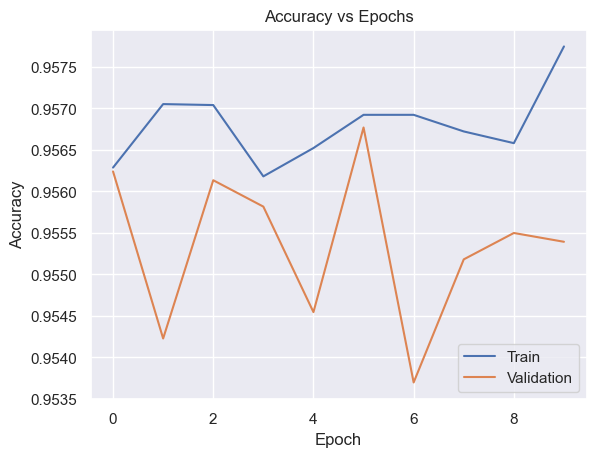

In [333]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [325]:
model_1.evaluate(X_train_normalized, y_train, verbose = 1)
test_pred = np.round(model_1.predict(X_train_normalized))

2950/2950 [==============================] - 4s 1ms/step


In [326]:
right = 0
tot = 0
for i in range(len(y_train)):
    tot +=1
    if y_train.iloc[i] == int(test_pred.flatten()[i]):
        right +=1

right/tot

0.9616652009451255

In [327]:
test_pred = np.round(model_1.predict(X_test_normalized))
len(test_pred.flatten())

1113/1113 [==============================] - 1s 1ms/step


35602

In [328]:
df_DL_test = df_union_test.copy()[['ID', 'Seat_Comfort' ]]
df_DL_test.rename(columns = {'Seat_Comfort' : 'Overall_Experience'}, inplace=True)
df_DL_test['Overall_Experience'] = test_pred.flatten()
df_DL_test.head()

,ID,Overall_Experience
0,99900001,1.0
1,99900002,1.0
2,99900003,1.0
3,99900004,0.0
4,99900005,1.0


In [329]:
df_DL_test.to_csv('DL_test_final.csv', index=None)

In [36]:
test_pred.flatten()

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
model_3.evaluate(X_train_test_normalized, y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test_normalized))

In [8]:
numeric_features_min_max = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering','Platform_Location', 'Onboard_Wifi_Service', 
                            'Onboard_Entertainment','Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 
                            'CheckIn_Service', 'Cleanliness','Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel','Travel_Class']

numeric_features_standard = [   'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']


numeric_transformer = Pipeline(
    steps = [ ('scaler1', MinMaxScaler() ), ('scaler2', StandardScaler() ), ('imputer', KNNImputer(n_neighbors=4) ) ] 
    # ('imputer', SimpleImputer(strategy='median') ), ADD LATER ON, , ('imputer',  IterativeImputer(random_state=0, initial_strategy='median') ('imputer', KNNImputer(n_neighbors=4) )
)

# Here the pre-processor step
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric1", numeric_transformer, numeric_features_min_max ),
        ("numeric2", numeric_transformer, numeric_features_standard )
    ]
)

# here the Pipeline
pipe_rf = Pipeline(
    steps = [('preprocessor', preprocessor), ('regressor', RandomForestClassifier(n_estimators = 100, n_jobs=-1) ) ]#n_estimators =1000 5min try 2k
)


#pipe_rf.fit(X_train_train, y_train_train)

#y_pred_train_train = pipe_rf.predict(X_train_train)

#metrics_score(y_train_train, y_pred_train_train)


In [ ]:
pipe_rf.fit(X_train_train, y_train_train)

y_pred_train_test = pipe_rf.predict(X_train_test)

#metrics_score(y_train_test, y_pred_train_test)
accuracy(y_train_test, y_pred_train_test)